In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import vmo
import vmo.analysis as van
import vmo.analysis.segmentation as vse
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import patches
import librosa

%matplotlib inline

## Load file and extract feature

In [53]:
#song_path = './vae_generated_chord_0410.wav'
song_path = './rnn_generated_chord_0410.wav'

sr = 22050
hop_length = 512

y, sr = librosa.load(song_path, sr=sr)
cqt = librosa.core.cqt(y, sr=sr, hop_length=hop_length)
features = librosa.logamplitude(cqt,ref_power=np.max)

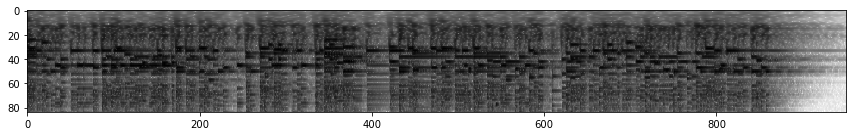

In [54]:
plt.figure(figsize=(12,2))
plt.imshow(features, interpolation='nearest', aspect='auto', cmap='Greys')
plt.tight_layout()

In [55]:
r = (0.01, 0.81, 0.01)
threshold = vmo.find_threshold(features.T, r=r, dim=features.shape[0])

ideal_t = 0.02
Total IR = 3952.2480736


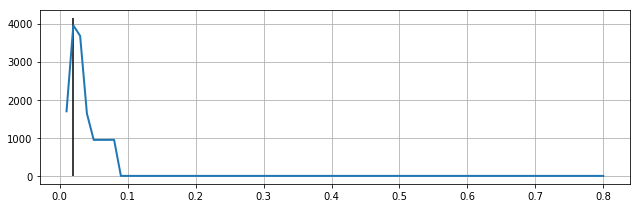

In [56]:
x_t = np.array([t[1] for t in threshold[1]])
y_t = [t[0] for t in threshold[1]] 
plt.figure(figsize = (9,3))
plt.plot(x_t, y_t, linewidth = 2)
ymin, ymax = plt.ylim()
plt.vlines(threshold[0][1], 0, ymax)
plt.grid('on')
plt.tight_layout()
print "ideal_t =", threshold[0][1]
print "Total IR =", threshold[0][0]

In [57]:
ideal_t = threshold[0][1]
best_oracle = vmo.build_oracle(features.T, flag='a', threshold=ideal_t, dim=features.shape[0])

In [58]:
ir, h0, h1 = best_oracle.IR()
np.shape(ir)

(951,)

/Users/sdubnov/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


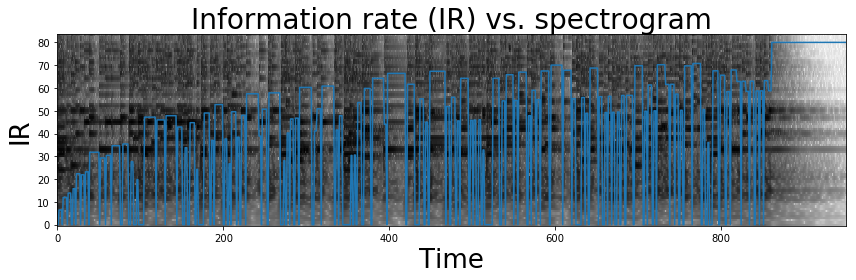

In [59]:
plt.figure(figsize=(12,4))
plt.imshow(features, interpolation='nearest', aspect='auto', cmap='Greys', origin='lower')
plt.tight_layout()
ir = np.array(ir)
ir = (ir / ir.max())*80
plt.hold('on')
plt.plot(ir)
plt.title('Information rate (IR) vs. spectrogram', fontsize=28)
plt.xlabel('Time', fontsize=26)
plt.ylabel('IR', fontsize=26)
plt.axis('tight')
plt.tight_layout()